Кроква Михайло, 4-6 ФІТ

In [112]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

1.	Набір даних "Breast Cancer".

In [113]:
data = load_breast_cancer()
X = data.data
y = data.target

2.	Розділяємо дані на тренувальний та тестовий набори.

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3.	Застосуємо випадковий ліс для визначення важливих ознак.

In [115]:
rf_cl = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cl.fit(X_train, y_train)

feature_importances = rf_cl.feature_importances_

4.	Побудуємо графік, щоб показати важливість кожної ознаки в аналізі.

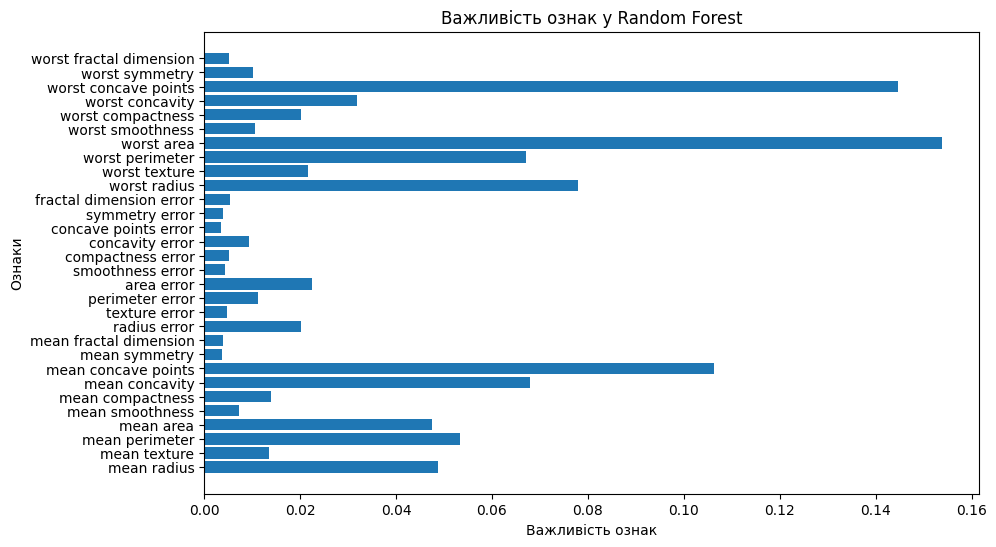

In [116]:
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importances, align='center')
plt.yticks(range(X.shape[1]), data.feature_names)
plt.xlabel('Важливість ознак')
plt.ylabel('Ознаки')
plt.title('Важливість ознак у Random Forest')
plt.show()

5.	Обговорюємо результати та визначаємо, які ознаки найбільше впливають на вихідні дані.

Worst area, worst concavity та mean concave points найважливіші ознаки, саме вони найбільше впливають на вихідні дані.

6.	Обчислимо точність для двох алгоритмів і порівняємо результати.

In [117]:
rf_pr = rf_cl.predict(X_test)
rf_ac = accuracy_score(y_test, rf_pr)
print('Random Forest: ', rf_ac)

svm_cl = SVC(kernel='linear')
svm_cl.fit(X_train, y_train)
svm_pr = svm_cl.predict(X_test)
svm_ac = accuracy_score(y_test, svm_pr)
print('SVM: ', svm_ac)

Random Forest:  0.9649122807017544
SVM:  0.956140350877193


In [118]:
if svm_ac > rf_ac:
    print('Алгоритм SVM є більш точним.')
elif svm_ac < rf_ac:
    print('Алгоритм Random Forest є більш точним.')
else:
    print('Обидва алгоритми мають однакову точність.')

Алгоритм Random Forest є більш точним.


В ході роботи я застосував випадковий ліс для визначення важливих ознак,навчився будувати графік, обговорив результати та порівняв точніть двух алгоритмів.